<a href="https://colab.research.google.com/github/Paras1024/Heart_Failure_Detection/blob/main/Heart_Failure_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Dataset**

Downloaded from: https://www.kaggle.com/fedesoriano/heart-failure-prediction/version/1

In [1]:
from google.colab import files
uploaded = files.upload()

Saving heart.csv to heart (2).csv


In [2]:
try:
  %tensorflow_version 2.x
except Exception:
  pass


from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
from tensorflow import keras
from keras.utils import np_utils
import sklearn
import sklearn.preprocessing
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


Using Interpolation to fill NA values in the Dataset

In [3]:
dataset = pd.read_csv('heart.csv')
dataset['Cholesterol'] = dataset['Cholesterol'].replace(to_replace = 0,value = np.nan)
dataset['RestingBP'] = dataset['RestingBP'].replace(to_replace = 0,value = np.nan)
dataset = dataset.interpolate(method = 'polynomial',order = 1,axis = 0)
dataset = dataset.sample(frac = 1)

# Plotting the Data

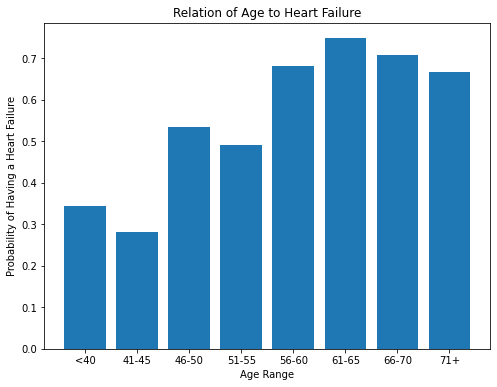

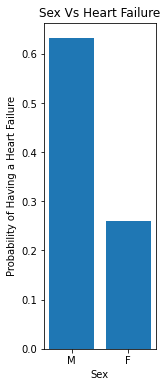

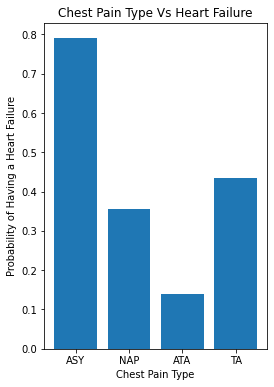

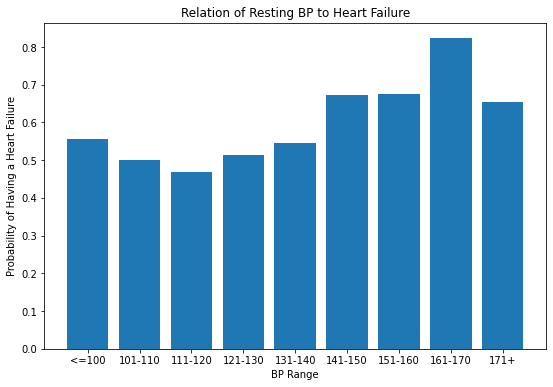

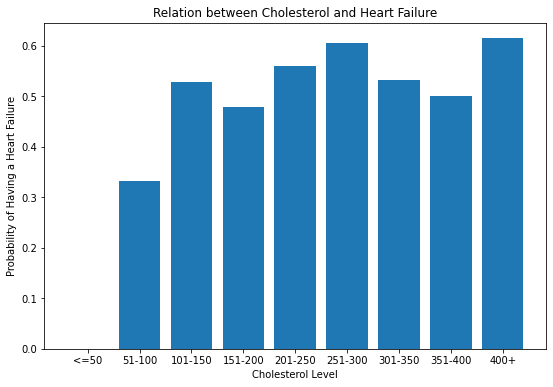

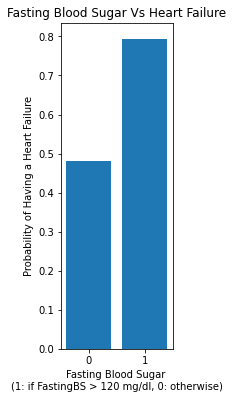

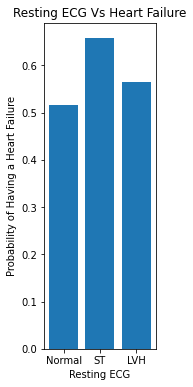

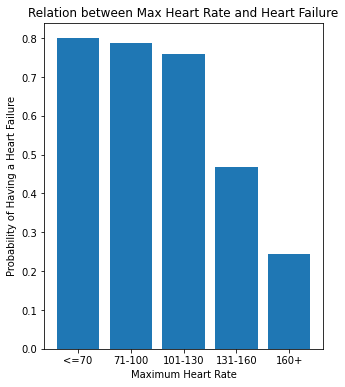

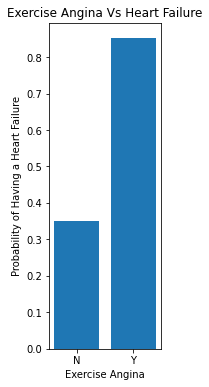

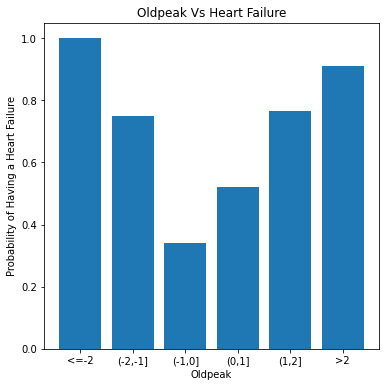

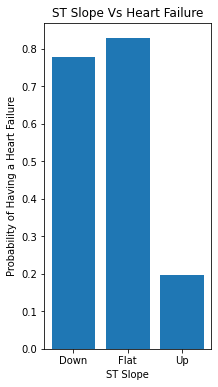

In [4]:

#Age 

def percentage_range(a,b):
  return sum(dataset[(dataset['Age']>a) & (dataset['Age']<=b)]['HeartDisease'])/len(dataset[(dataset['Age']>a) & (dataset['Age']<=b)]['HeartDisease'])

Age_labels = ['<40','41-45','46-50','51-55','56-60','61-65','66-70','71+']
Age_x = [1,2,3,4,5,6,7,8]
Age_y = [percentage_range(-1,40),percentage_range(40,45),percentage_range(45,50),percentage_range(50,55),percentage_range(55,60),percentage_range(60,65),percentage_range(65,70),percentage_range(70,100)]


fig = plt.figure(figsize = (8,6))
ax = fig.add_subplot(111)
ax.bar(Age_x,Age_y)
plt.xticks(Age_x,Age_labels)
ax.set(title = 'Relation of Age to Heart Failure',xlabel = 'Age Range',ylabel = 'Probability of Having a Heart Failure')
plt.show()

#Sex 
Sex_labels = ['M','F']
Sex_x = [1,2]
Sex_y = [sum(dataset[(dataset['Sex']=='M')]['HeartDisease'])/len(dataset[(dataset['Sex']=='M')]),sum(dataset[(dataset['Sex']=='F')]['HeartDisease'])/len(dataset[(dataset['Sex']=='F')]['HeartDisease'])]

fig = plt.figure(figsize = (2,6))
ax = fig.add_subplot(111)
ax.bar(Sex_x,Sex_y)
plt.xticks(Sex_x,Sex_labels)
ax.set(title = 'Sex Vs Heart Failure',xlabel = 'Sex',ylabel = 'Probability of Having a Heart Failure')
plt.show()

#Chest Pain 

def cp_percentage(a):
  return sum(dataset[dataset['ChestPainType']==a]['HeartDisease'])/len(dataset[dataset['ChestPainType']==a]['HeartDisease'])


cp_labels = ['ASY','NAP','ATA','TA']
cp_x = [1,2,3,4]
cp_y = [cp_percentage('ASY'),cp_percentage('NAP'),cp_percentage('ATA'),cp_percentage('TA')]

fig = plt.figure(figsize = (4,6))
ax = fig.add_subplot(111)
ax.bar(cp_x,cp_y)
plt.xticks(cp_x,cp_labels)
ax.set(title = 'Chest Pain Type Vs Heart Failure',xlabel = 'Chest Pain Type',ylabel = 'Probability of Having a Heart Failure')
plt.show()

#Resting Blood Pressure
def bp_range(a,b):
  return sum(dataset[(dataset['RestingBP']>a) & (dataset['RestingBP']<=b)]['HeartDisease'])/len(dataset[(dataset['RestingBP']>a) & (dataset['RestingBP']<=b)]['HeartDisease'])

bp_labels = ['<=100','101-110','111-120','121-130','131-140','141-150','151-160','161-170','171+']
bp_x = [1,2,3,4,5,6,7,8,9]
bp_y = [bp_range(-1,100),bp_range(100,110),bp_range(110,120),bp_range(120,130),bp_range(130,140),bp_range(140,150),bp_range(150,160),bp_range(160,170),bp_range(170,250)]


fig = plt.figure(figsize = (9,6))
ax = fig.add_subplot(111)
ax.bar(bp_x,bp_y)
plt.xticks(bp_x,bp_labels)
ax.set(title = 'Relation of Resting BP to Heart Failure',xlabel = 'BP Range',ylabel = 'Probability of Having a Heart Failure')
plt.show()

#Cholesterol
def chol_range(a,b):
  if len(dataset[(dataset['Cholesterol']>a) & (dataset['Cholesterol']<=b)]['HeartDisease']) == 0:
    return 0
  return sum(dataset[(dataset['Cholesterol']>a) & (dataset['Cholesterol']<=b)]['HeartDisease'])/len(dataset[(dataset['Cholesterol']>a) & (dataset['Cholesterol']<=b)]['HeartDisease'])

chol_labels = ['<=50','51-100','101-150','151-200','201-250','251-300','301-350','351-400','400+']
chol_x = [1,2,3,4,5,6,7,8,9]
chol_y = [chol_range(-1,50),chol_range(50,100),chol_range(100,150),chol_range(150,200),chol_range(200,250),chol_range(250,300),chol_range(300,350),chol_range(350,400),chol_range(400,1000)]


fig = plt.figure(figsize = (9,6))
ax = fig.add_subplot(111)
ax.bar(chol_x,chol_y)
plt.xticks(chol_x,chol_labels)
ax.set(title = 'Relation between Cholesterol and Heart Failure',xlabel = 'Cholesterol Level',ylabel = 'Probability of Having a Heart Failure')
plt.show()

#Fasting Blood Sugar
fbs_x = [0,1]
fbs_y = [sum(dataset[(dataset['FastingBS']==0)]['HeartDisease'])/len(dataset[(dataset['FastingBS']==0)]),sum(dataset[(dataset['FastingBS']==1)]['HeartDisease'])/len(dataset[(dataset['FastingBS']==1)]['HeartDisease'])]
fig = plt.figure(figsize = (2,6))
ax = fig.add_subplot(111)
ax.bar(fbs_x,fbs_y)
ax.set(title = 'Fasting Blood Sugar Vs Heart Failure',xlabel = 'Fasting Blood Sugar \n(1: if FastingBS > 120 mg/dl, 0: otherwise)',ylabel = 'Probability of Having a Heart Failure')
plt.show()

#Resting ECG
recg_x = ['Normal','ST','LVH']
recg_y = [sum(dataset[(dataset['RestingECG']=='Normal')]['HeartDisease'])/len(dataset[(dataset['RestingECG']=='Normal')]),sum(dataset[(dataset['RestingECG']=='ST')]['HeartDisease'])/len(dataset[(dataset['RestingECG']=='ST')]['HeartDisease']),sum(dataset[(dataset['RestingECG']=='LVH')]['HeartDisease'])/len(dataset[(dataset['RestingECG']=='LVH')]['HeartDisease'])]
fig = plt.figure(figsize = (2,6))
ax = fig.add_subplot(111)
ax.bar(recg_x,recg_y)
ax.set(title = 'Resting ECG Vs Heart Failure',xlabel = 'Resting ECG',ylabel = 'Probability of Having a Heart Failure')
plt.show()


#Max Heart Rate

def hr_range(a,b):
  if len(dataset[(dataset['MaxHR']>a) & (dataset['MaxHR']<=b)]['HeartDisease']) == 0:
    return 0
  return sum(dataset[(dataset['MaxHR']>a) & (dataset['MaxHR']<=b)]['HeartDisease'])/len(dataset[(dataset['MaxHR']>a) & (dataset['MaxHR']<=b)]['HeartDisease'])

hr_x = ['<=70','71-100','101-130','131-160','160+']
hr_y = [hr_range(-1,70),hr_range(70,100),hr_range(100,130),hr_range(130,160),hr_range(160,190)]


fig = plt.figure(figsize = (5,6))
ax = fig.add_subplot(111)
ax.bar(hr_x,hr_y)

ax.set(title = 'Relation between Max Heart Rate and Heart Failure',xlabel = 'Maximum Heart Rate',ylabel = 'Probability of Having a Heart Failure')
plt.show()

## Exercise Angina
ea_x = ['N','Y']
ea_y = [sum(dataset[(dataset['ExerciseAngina']=='N')]['HeartDisease'])/len(dataset[(dataset['ExerciseAngina']=='N')]),sum(dataset[(dataset['ExerciseAngina']=='Y')]['HeartDisease'])/len(dataset[(dataset['ExerciseAngina']=='Y')]['HeartDisease'])]
fig = plt.figure(figsize = (2,6))
ax = fig.add_subplot(111)
ax.bar(ea_x,ea_y)
ax.set(title = 'Exercise Angina Vs Heart Failure',xlabel = 'Exercise Angina',ylabel = 'Probability of Having a Heart Failure')
plt.show()

#Oldpeak
def op_range(a,b):
  if len(dataset[(dataset['Oldpeak']>a) & (dataset['Oldpeak']<=b)]['HeartDisease']) == 0:
    return 0
  return sum(dataset[(dataset['Oldpeak']>a) & (dataset['Oldpeak']<=b)]['HeartDisease'])/len(dataset[(dataset['Oldpeak']>a) & (dataset['Oldpeak']<=b)]['HeartDisease'])

op_x = ['<=-2','(-2,-1]','(-1,0]','(0,1]','(1,2]','>2']
op_y = [op_range(-10,-2),op_range(-2,-1),op_range(-1,0),op_range(0,1),op_range(1,2),op_range(2,10)]
fig = plt.figure(figsize = (6,6))
ax = fig.add_subplot(111)
ax.bar(op_x,op_y)
ax.set(title = 'Oldpeak Vs Heart Failure',xlabel = 'Oldpeak',ylabel = 'Probability of Having a Heart Failure')
plt.show()

#ST Slope
sts_x = ['Down','Flat','Up']
sts_y = [sum(dataset[(dataset['ST_Slope']=='Down')]['HeartDisease'])/len(dataset[(dataset['ST_Slope']=='Down')]),sum(dataset[(dataset['ST_Slope']=='Flat')]['HeartDisease'])/len(dataset[(dataset['ST_Slope']=='Flat')]['HeartDisease']),sum(dataset[(dataset['ST_Slope']=='Up')]['HeartDisease'])/len(dataset[(dataset['ST_Slope']=='Up')]['HeartDisease'])]
fig = plt.figure(figsize = (3,6))
ax = fig.add_subplot(111)
ax.bar(sts_x,sts_y)
ax.set(title = 'ST Slope Vs Heart Failure',xlabel = 'ST Slope',ylabel = 'Probability of Having a Heart Failure')
plt.show()

## One-Hot Encoding to convert Categorical Data

In [5]:

dummies  = pd.get_dummies(dataset,prefix=['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope'],columns = ['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope'])
dummies = dummies.drop(['Sex_F','ChestPainType_ATA','RestingECG_Normal','ExerciseAngina_N','ST_Slope_Up'],axis = 'columns')
dummies.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ASY,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat
715,44,108.0,141.0,0,175,0.6,0,0,0,1,0,0,0,0,0,1
608,62,158.0,170.0,0,138,0.0,1,1,1,0,0,0,1,1,0,1
37,41,110.0,250.0,0,142,0.0,0,0,0,0,0,0,1,0,0,0
783,45,138.0,236.0,0,152,0.2,0,0,1,0,0,1,0,1,0,1
814,77,125.0,304.0,0,162,0.0,1,1,1,0,0,1,0,1,0,0


In [6]:
dataset = dummies

# Using dataset2 as a variable to avoid any changes in original dataset
dataset2 = dataset
min_max_scaler = sklearn.preprocessing.MinMaxScaler()
dataset2[['Age',	'RestingBP',	'Cholesterol', 'MaxHR',	'Oldpeak']] = min_max_scaler.fit_transform(dataset2[['Age',	'RestingBP',	'Cholesterol', 'MaxHR',	'Oldpeak']])

dataset2.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ASY,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat
715,0.326531,0.233333,0.108108,0,0.809859,0.363636,0,0,0,1,0,0,0,0,0,1
608,0.693878,0.650000,0.164093,0,0.549296,0.295455,1,1,1,0,0,0,1,1,0,1
37,0.265306,0.250000,0.318533,0,0.577465,0.295455,0,0,0,0,0,0,1,0,0,0
783,0.346939,0.483333,0.291506,0,0.647887,0.318182,0,0,1,0,0,1,0,1,0,1
814,1.000000,0.375000,0.422780,0,0.718310,0.295455,1,1,1,0,0,1,0,1,0,0


In [7]:
training_dataset = dataset2[0:700]
cv_dataset = dataset2[700:800]
test_dataset = dataset2[800:]

training_features = training_dataset.copy()
training_labels  = pd.DataFrame(training_features.pop('HeartDisease'))

cv_features = test_dataset.copy()
cv_labels  = pd.DataFrame(cv_features.pop('HeartDisease'))

test_features = test_dataset.copy()
test_labels  = pd.DataFrame(test_features.pop('HeartDisease'))

training_features.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_M,ChestPainType_ASY,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat
715,0.326531,0.233333,0.108108,0,0.809859,0.363636,0,0,1,0,0,0,0,0,1
608,0.693878,0.650000,0.164093,0,0.549296,0.295455,1,1,0,0,0,1,1,0,1
37,0.265306,0.250000,0.318533,0,0.577465,0.295455,0,0,0,0,0,1,0,0,0
783,0.346939,0.483333,0.291506,0,0.647887,0.318182,0,1,0,0,1,0,1,0,1
814,1.000000,0.375000,0.422780,0,0.718310,0.295455,1,1,0,0,1,0,1,0,0


**Creating a Model and testing it on Cross Validation Data**


In [8]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(1,input_dim = 15,activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
print(model.summary())
model.fit(training_features,training_labels,epochs = 100)
model.evaluate(cv_features,cv_labels)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 16        
                                                                 
Total params: 16
Trainable params: 16
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
22/22 [==============================] - 1s 2ms/step - loss: 0.8134 - accuracy: 0.4471
Epoch 2/100
22/22 [==============================] - 0s 2ms/step - loss: 0.7997 - accuracy: 0.4643
Epoch 3/100
22/22 [==============================] - 0s 1ms/step - loss: 0.7876 - accuracy: 0.4771
Epoch 4/100
22/22 [==============================] - 0s 2ms/step - loss: 0.7759 - accuracy: 0.4800
Epoch 5/100
22/22 [==============================] - 0s 2ms/step - loss: 0.7645 - accuracy: 0.4900
Epoch 6/100
22/22 [==============================] - 0s 2ms/step - loss: 0.7530 - accura

[0.3782222270965576, 0.8559321761131287]

**Checking the Accuracy on Test Data**

In [9]:
model.evaluate(test_features,test_labels)

4/4 [==============================] - 0s 3ms/step - loss: 0.3782 - accuracy: 0.8559


[0.3782222270965576, 0.8559321761131287]